<a href="https://colab.research.google.com/github/Parabucolica/ProgramacaoEstatistica/blob/main/labs/Prog_Estat_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Exercício: Simulação de Normal via Aceitação–Rejeição

Implemente o método de aceitação–rejeição para gerar variáveis aleatórias segundo os seguintes passos:

**a)** Gere uma variável $Y \sim \text{Exponencial}(1)$ e use-a como proposta para simular o valor absoluto de uma normal padrão $|Z| \sim \text{HalfNormal}(0,1)$.  

**b)** A partir da variável da letra (a), use uma Bernoulli(1/2) para atribuir o sinal aleatoriamente e obter uma normal padrão $Z \sim \mathcal{N}(0,1)$.  

**c)** Transforme o resultado da letra (b) em uma normal geral $X \sim \mathcal{N}(\mu,\sigma^2)$ por meio de transformação afim.  

Gere uma amostra com $N = 10^6$ observações e compare os histogramas com a versão do NumPy (`np.random.normal`).  


[Text(0.5, 1.0, 'Função Numpy')]

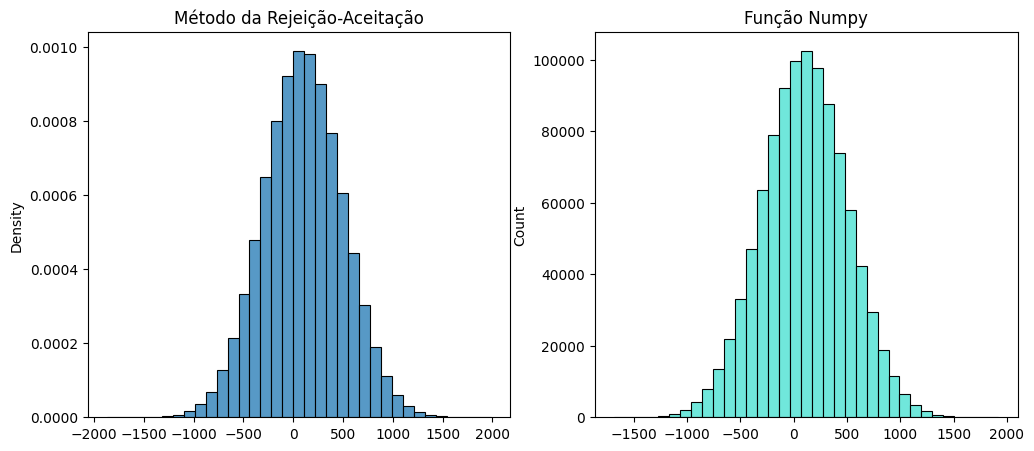

In [2]:
def bernoulli(p):
  return 1 if np.random.uniform() <=p else 0

def exponencial(lmda):
  u = np.random.uniform()
  return float(-np.log(u)/lmda)

c = math.sqrt((2*math.e)/math.pi)

def h_normal():
  u= np.random.uniform()
  y = exponencial(1)
  while u > (2/math.sqrt(2*math.pi))*math.e**((-y**2)/2)/ c*math.e**y:
    y = exponencial(1)
    u = np.random.uniform()
  return y

def normal_padrao():
  return h_normal() if bernoulli(1/2) else -h_normal()

def normal(mu, sig):
  return normal_padrao()*sig + mu

fig, axes = plt.subplots(ncols=2, figsize = (12,5))
sns.histplot([normal(100,400) for _ in range(1000000)], stat='density', bins=35, ax=axes[0]).set(title="Método da Rejeição-Aceitação")
sns.histplot(np.random.normal(100,400,size=1000000), bins= 35, ax=axes[1], color="turquoise").set(title='Função Numpy')


## Exercício 2: Amostragem por Rejeição

Considere a distribuição
$$
f(x) = \tfrac{1}{2}\,\sin(x), \quad x \in [0,\pi].
$$

Use o método de aceitação–rejeição para gerar amostras dessa distribuição.

- Escolha uma proposta $g(x)$ adequada.  
- Encontre e exiba a constante $c$ tal que $c > \max_x \tfrac{f(x)}{g(x)}$.  
- Implemente o algoritmo para gerar amostras de $f(x)$.  
- Calcule o número médio de tentativas necessárias até aceitar um ponto.  
- Compare esse valor com a eficiência teórica esperada dada por $1/c$.  


[(1.9812127646135802, 1), (2.0972664868603603, 1), (1.3956766885782945, 1), (2.096889077848298, 2), (2.809900676893536, 3), (1.6558459009830302, 2), (1.9116519766916973, 1), (1.3526693488445145, 1), (2.330942446240325, 1), (2.4855896541453553, 1), (2.695553944822642, 2), (1.538647615700352, 2), (0.8256511241454, 3), (1.6546918963574608, 2), (1.740393637661116, 4), (2.5568658729660405, 1), (2.2549535200106394, 1), (1.8818253954937427, 1), (0.8316628536251197, 2), (0.2556453220765773, 1), (0.3341677132978876, 1), (2.0546692164869436, 1), (1.888551568684398, 2), (0.20266780825497066, 2), (0.9552050387116157, 4), (1.2440877799996124, 2), (1.2340295235096659, 1), (1.4161436321290808, 1), (1.3919834514248695, 2), (2.683061583677561, 1), (2.1357094520756355, 1), (1.8095375300010572, 1), (2.463471837601724, 1), (2.280316385220713, 1), (2.1951212540022276, 1), (1.880523707225167, 1), (1.3738722022660175, 1), (2.8939769768860737, 1), (2.8959634160319743, 3), (2.550929694341101, 1), (2.3764624209

[Text(0.5, 1.0, 'Histograma da Densidade')]

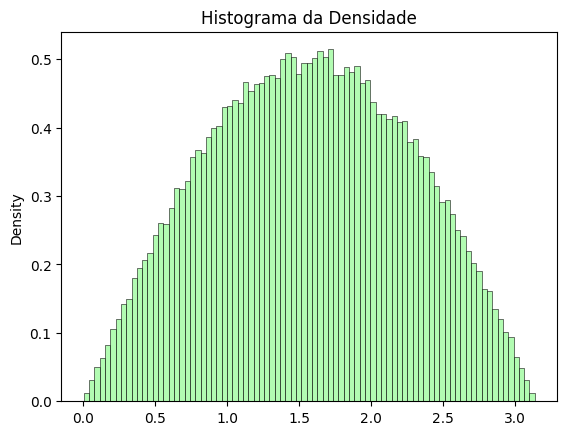

In [4]:
def simular():
  y = np.random.uniform()*np.pi
  u = np.random.uniform()
  razao = math.sin(y)
  tentativas=1
  while u > razao:
    y = np.random.uniform()*np.pi
    razao = math.sin(y)
    u = np.random.uniform()
    tentativas += 1

  return y,tentativas


a = [(simular()) for _ in range(100000)]
print(a)


print('Média de Tentativas: ',sum(a[i][1] for i in range(len(a)))/len(a),
      f'\nEficiência Teórica: {np.pi/2}')


sns.histplot([a[i][0] for i in range(len(a))], stat="density", color = "palegreen", bins= 85).set(title="Histograma da Densidade")
